# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [2]:
import stumpy

In [4]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/78/ls6xxrjj16jbfmkyzbmh7hwr0000gn/T/pip-install-ijfqa8bi/sklearn_738a81a4a401493cbcb8d22d8474c288/setup.py'"'"'; __file__='"'"'/private/var/folders/78/ls6xxrjj16jbfmkyzbmh7hwr0000gn/T/pip-install-ijfqa8bi/sklearn_738a81a4a401493cbcb8d22d8474c288/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/78/ls6xxrjj16jbfmkyzbmh7hwr0000gn/T/pip-pip-egg-info-p5vvy8_9
         cwd: /private/var/folders/78/ls6xxrjj16jbfmkyzbmh7hwr0000gn/T/pip-install-ijfqa8bi/sklea

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import stumpy
from scipy.spatial.distance import cdist

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

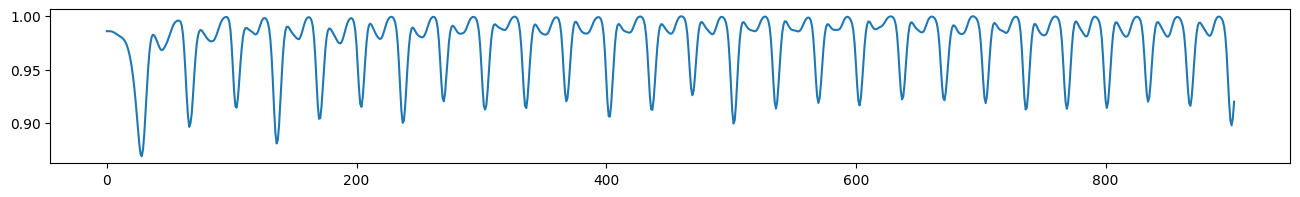

In [ ]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('/Users/rm22/Documents/susu/term3/time_series/2025-Rakov-TimeSeriesCourse/practice/06 Chains/datasets/Rotation Matrix.txt')
ax.plot(ts)

In [5]:
m = 25
mp = stumpy.stump(ts, m=m)
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
unanchored_chain

array([199, 331, 398, 432, 863])

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Найдена цепочка из 5 похожих паттернов, начинающихся в точках [199, 331, 398, 432, 863]
Длина паттерна: 25 точек

### Что это значит:

Повторяющееся поведение - система регулярно возвращается к похожим состояниям

Не точные копии - паттерны эволюционируют, каждый немного отличается от предыдущего

Изменяющиеся интервалы - время между появлениями паттернов разное (132, 67, 34, 431 точек)

### Для "Rotation Matrix":

Это могут быть фазы вращения или циклы колебаний
Разные интервалы говорят о непостоянной скорости/частоте
Эволюция паттернов показывает постепенное изменение параметров системы

### Вывод: Система имеет сложную динамику с квазипериодическими повторениями, которые меняются со временем.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

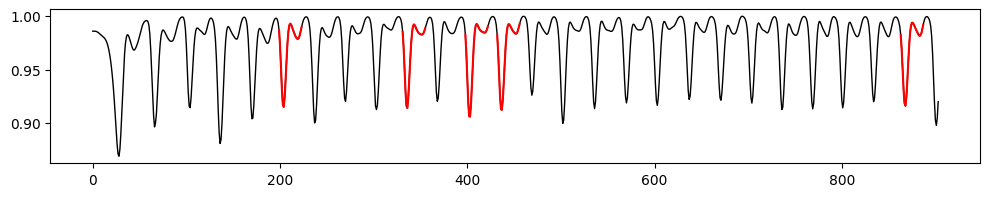

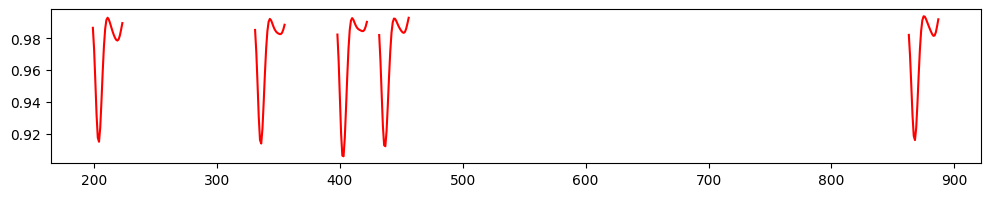

In [6]:
fig, ax = plt.subplots(figsize=(12, 2))
ax.plot(ts, linewidth=1, color='black')
for i in range(unanchored_chain.shape[0]):
    y = ts[unanchored_chain[i]:unanchored_chain[i]+m]
    x = range(unanchored_chain[i], unanchored_chain[i]+m)
    plt.plot(x, y, color = 'red')
plt.show()

fig, ax = plt.subplots(figsize=(12, 2))
for i in range(unanchored_chain.shape[0]):
    y = ts[unanchored_chain[i]:unanchored_chain[i]+m]
    x = range(unanchored_chain[i], unanchored_chain[i]+m)
    plt.plot(x, y, color = 'red')
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Найдено 5 эволюционирующих паттернов (индексы: 199, 331, 398, 432, 863)

Графики подтверждают: паттерны одинаковой формы, но разной длины

Это означает, что система имеет устойчивое поведение, которое меняется в масштабе

Для "Rotation Matrix": фазы вращения сохраняют форму, но меняют длительность

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

In [6]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов.